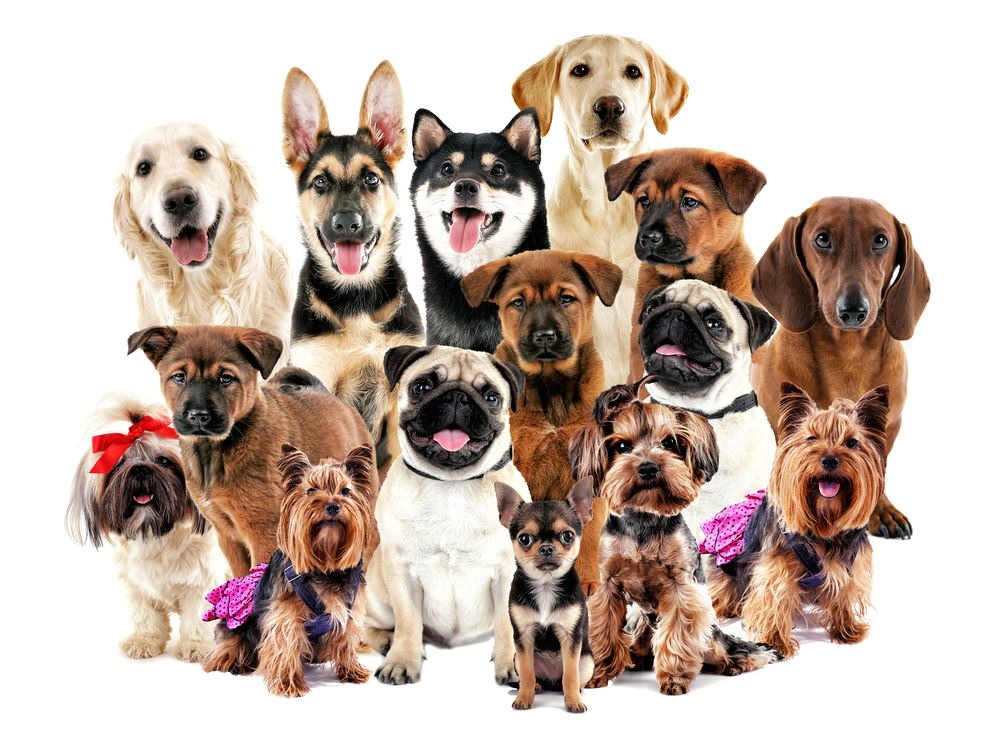

# Importing libraries and data 📩

In [1]:
# importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from keras import backend as bd
from keras.optimizers import Adam

In [2]:
# importing dataset's paths
train_data_path = '../input/dogbreedidentification/train'
test_data_path = '../input/dogbreedidentification/test'

# importing dataset's labels
traindf = pd.read_csv('../input/dogbreedidentification/labels.csv')
testdf = pd.read_csv('../input/dogbreedidentification/sample_submission.csv')

# Data inspection part 🧐

In [3]:
traindf.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
testdf.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


* Both dataset contain **id** feature which is the name of photo. So, we add **.jpg** extension to it.

In [5]:
# getting shape of train data
traindf.shape

(10222, 2)

* Train data conatin **10222** records and **2** features.

In [6]:
# getting shape of test data
testdf.shape

(10357, 121)

* Test data contain **10357** records and **121** features.
* As we know this dataset is already cleaned. So, we don't need to do any operations.
* We just need to add **.jpg** extension to **id** feature in both data.

In [7]:
# Let's add .jpg extension to id column in both dataset
traindf['id'] = traindf['id'].apply(lambda x: x + '.jpg')
testdf['id'] = testdf['id'].apply(lambda x: x + '.jpg')

In [8]:
traindf.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


In [9]:
testdf.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


## Get number of records of each breed

In [10]:
# counting records of each breed
breeds = list(set(traindf['breed']))
print('Total breeds present: {}'.format(len(breeds)))
breeds_num = dict(zip(breeds, sorted(range(len(breeds)), reverse=True)))
breeds_num

Total breeds present: 120


{'bedlington_terrier': 119,
 'lhasa': 118,
 'sussex_spaniel': 117,
 'pomeranian': 116,
 'miniature_poodle': 115,
 'dandie_dinmont': 114,
 'chihuahua': 113,
 'blenheim_spaniel': 112,
 'soft-coated_wheaten_terrier': 111,
 'collie': 110,
 'irish_terrier': 109,
 'komondor': 108,
 'irish_setter': 107,
 'briard': 106,
 'siberian_husky': 105,
 'norfolk_terrier': 104,
 'saluki': 103,
 'leonberg': 102,
 'beagle': 101,
 'vizsla': 100,
 'malinois': 99,
 'brabancon_griffon': 98,
 'american_staffordshire_terrier': 97,
 'toy_poodle': 96,
 'rhodesian_ridgeback': 95,
 'australian_terrier': 94,
 'cocker_spaniel': 93,
 'wire-haired_fox_terrier': 92,
 'bluetick': 91,
 'malamute': 90,
 'kerry_blue_terrier': 89,
 'eskimo_dog': 88,
 'bernese_mountain_dog': 87,
 'tibetan_mastiff': 86,
 'staffordshire_bullterrier': 85,
 'basset': 84,
 'groenendael': 83,
 'basenji': 82,
 'walker_hound': 81,
 'flat-coated_retriever': 80,
 'airedale': 79,
 'great_pyrenees': 78,
 'greater_swiss_mountain_dog': 77,
 'norwegian_elkh

## Plotting 16 random images

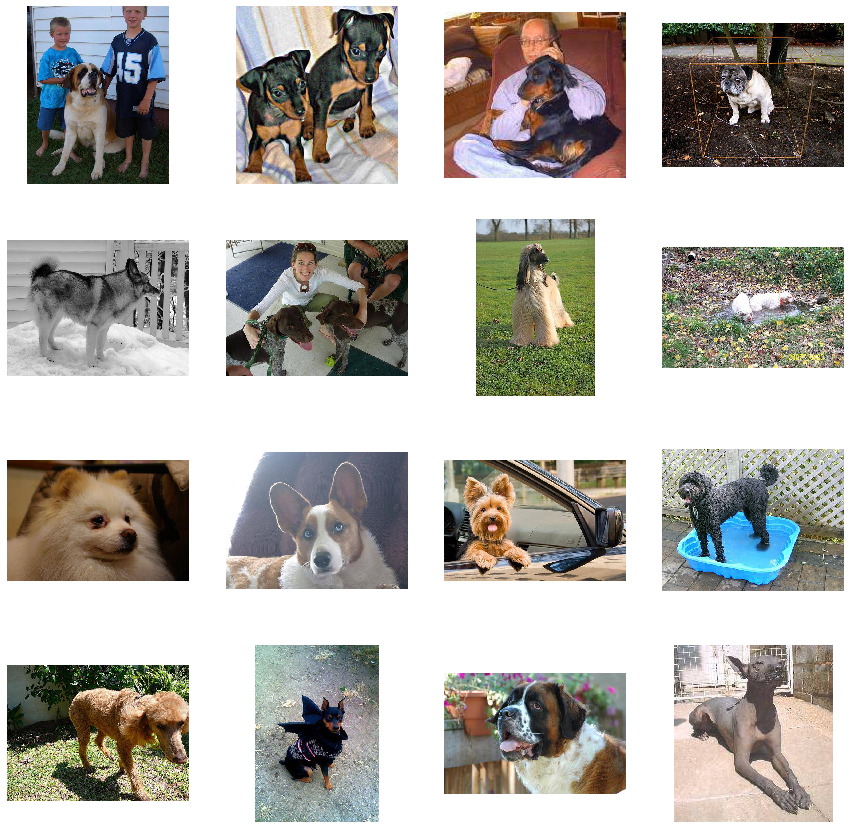

In [11]:
#display some images with help of matplotlib
sub_path = os.listdir(train_data_path)
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    num = random.randint(0, len(sub_path))
    img = plt.imread(os.path.join(train_data_path,sub_path[num]))
    plt.imshow(img, cmap='gray', interpolation='nearest')
    plt.axis('off')

# Data Processing part 🚧

In [12]:
#As instructed all other breeds except suggested ones are deleted
inc_breed=['beagle', 'chihuahua', 'doberman', 'french_bulldog', 'golden_retriever', 'malamute',
           'pug', 'saint_bernard', 'scottish_deerhound', 'tibetan_mastiff']
for i,breed in traindf.iterrows():
    if breed[1] not in inc_breed:
        traindf=traindf.drop([i])
       
len(traindf)

841

## Generating data for training set

In [13]:
# creating dataset for feature scaling and image augmentation 
train_datagen=ImageDataGenerator(rescale=1./255.,
                                 rotation_range=20,
                                 brightness_range=[0.2,1.0],
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 validation_split=0.1)

### Creating training set

In [14]:
# creating training set 
train_data=train_datagen.flow_from_dataframe(directory=train_data_path,
                                             dataframe=traindf,
                                             x_col="id",
                                             y_col="breed",
                                             subset="training",
                                             batch_size=32,
                                             seed=42,
                                             shuffle=True,
                                             class_mode="categorical",
                                             target_size=(224,224))

Found 757 validated image filenames belonging to 10 classes.


### Creating Validation set

In [15]:
# creating validation set
valid_data=train_datagen.flow_from_dataframe(directory=train_data_path,
                                                  dataframe=traindf,
                                                  x_col="id",
                                                  y_col="breed",
                                                  subset="validation",
                                                  batch_size=32,
                                                  seed=42,
                                                  shuffle=True,
                                                  class_mode="categorical",
                                                  target_size=(224,224))

Found 84 validated image filenames belonging to 10 classes.


## Generating data for test set

In [16]:
# only rescaling is applied
test_datagen = ImageDataGenerator(rescale=1./255.)

### Creating test set

In [34]:
# creating test set
test_data=test_datagen.flow_from_dataframe(directory=test_data_path,
                                           dataframe=testdf,
                                           x_col="id",
                                           y_col=None,
                                           batch_size=32,
                                           seed=42,
                                           shuffle=False,
                                           class_mode=None,
                                           target_size=(224,224))

Found 10357 validated image filenames.


## Training Part

### Using pre-trained model

In [18]:
#Freezing Resnet50 model to avoid weight updation
pretrained_model =ResNet50(weights='imagenet',
                           include_top=False,
                           input_shape=(224,224,3))

94773248/94765736 [==============================] - 1s 0us/step


### Model creation

In [19]:
model =Sequential([pretrained_model,
                   Flatten(),
                   Dense(2048, activation='relu'),
                   Dropout(0.5),
                   Dense(256, activation='relu'),
                   Dropout(0.5),
                   Dense(64, activation='relu'),
                   Dropout(0.3),
                   Dense(10, activation='softmax')])

In [20]:
# creating custom recall 
def recall_m(y_true, y_pred):
    true_positives =bd.sum(bd.round(bd.clip(y_true*y_pred,0,1)))
    possible_positives =bd.sum(bd.round(bd.clip(y_true,0,1)))
    recall =true_positives/(possible_positives+bd.epsilon())
    return recall

# creating custom precision
def precision_m(y_true, y_pred):
    true_positives =bd.sum(bd.round(bd.clip(y_true*y_pred,0,1)))
    predicted_positives =bd.sum(bd.round(bd.clip(y_pred,0,1)))
    precision = true_positives / (predicted_positives+bd.epsilon())
    return precision

# creating custom f1 score
def f1_m(y_true, y_pred): 
    precision =precision_m(y_true,y_pred)
    recall =recall_m(y_true,y_pred)
    return (2*((precision*recall)/(precision+recall+bd.epsilon())))

In [21]:
# adding Adam optimizer
opt=Adam(lr=1e-4)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc',f1_m,precision_m, recall_m])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

### Model fitting

In [23]:
#model fitting with 50 epochs
step_size_ =train_data.n//train_data.batch_size
valid_step_size_ =valid_data.n//valid_data.batch_size
history =model.fit(train_data,
                   steps_per_epoch=step_size_,
                   validation_data=valid_data,
                   validation_steps=valid_step_size_,
                   epochs=50)

Epoch 1/50
23/23 [==============================] - 27s 761ms/step - loss: 6.9122 - acc: 0.1080 - f1_m: 0.0971 - precision_m: 0.1056 - recall_m: 0.0900 - val_loss: 2.3609 - val_acc: 0.0781 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
23/23 [==============================] - 15s 632ms/step - loss: 4.4998 - acc: 0.1600 - f1_m: 0.1332 - precision_m: 0.1615 - recall_m: 0.1150 - val_loss: 2.3249 - val_acc: 0.1250 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/50
23/23 [==============================] - 14s 600ms/step - loss: 3.0115 - acc: 0.2467 - f1_m: 0.2130 - precision_m: 0.2849 - recall_m: 0.1709 - val_loss: 2.2605 - val_acc: 0.1250 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/50
23/23 [==============================] - 14s 627ms/step - loss: 2.4356 - acc: 0.3448 - f1_m: 0.2851 - precision_m: 0.4215 - recall_m: 0.2169 - val_loss: 23.0995 - val_acc: 0.1250 - v

## Plotting Curves

### Getting model accuracy curve

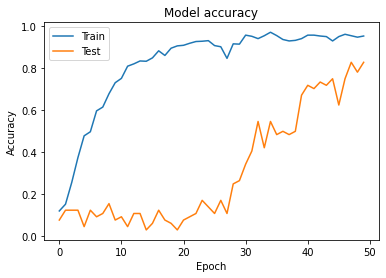

In [24]:
# plotting accuracy with epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

### Getting model loss curve

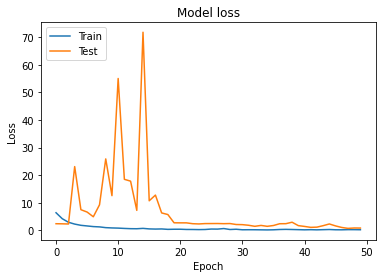

In [25]:
# plotting 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [26]:
#judging criterias of our model
loss, accuracy, f1_score, precision, recall = model.evaluate(valid_data,batch_size=32)

print("Loss:", loss)
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)

3/3 [==============================] - 1s 471ms/step - loss: 0.3296 - acc: 0.8929 - f1_m: 0.8789 - precision_m: 0.9504 - recall_m: 0.8229
Loss: 0.32956820726394653
Accuracy: 0.8928571343421936
F1 Score: 0.8789011836051941


#### Saving Model

In [27]:
model.save("DogBreedClassification.h5")

## Prediction

In [36]:
predictions=model.predict(test_data)

In [37]:
pred  = [np.argmax(i) for i in predictions]

In [38]:
X = next(test_data)
X.shape

(32, 224, 224, 3)

In [42]:
results={0: 'affenpinscher',
         1: 'afghan_hound',
         2: 'african_hunting_dog',
         3: 'airedale',
         4: 'american_staffordshire_terrier',
         5: 'appenzeller',
         6: 'australian_terrier',
         7: 'basenji',
         8: 'basset',
         9: 'beagle',
         10: 'bedlington_terrier',
         11: 'bernese_mountain_dog',
         12: 'black-and-tan_coonhound',
         13: 'blenheim_spaniel',
         14: 'bloodhound',
         15: 'bluetick',
         16: 'border_collie',
         17: 'border_terrier',
         18: 'borzoi',
         19: 'boston_bull',
         20: 'bouvier_des_flandres',
         21: 'boxer',
         22: 'brabancon_griffon',
         23: 'briard',
         24: 'brittany_spaniel',
         25: 'bull_mastiff',
         26: 'cairn',
         27: 'cardigan',
         28: 'chesapeake_bay_retriever',
         29: 'chihuahua',
         30: 'chow',
         31: 'clumber',
         32: 'cocker_spaniel',
         33: 'collie',
         34: 'curly-coated_retriever',
         35: 'dandie_dinmont',
         36: 'dhole',
         37: 'dingo',
         38: 'doberman',
         39: 'english_foxhound',
         40: 'english_setter', 
         41: 'english_springer',
         42: 'entlebucher',
         43: 'eskimo_dog',
         44: 'flat-coated_retriever',
         45: 'french_bulldog',
         46: 'german_shepherd',
         47: 'german_short-haired_pointer',
         48: 'giant_schnauzer',
         49: 'golden_retriever',
         50: 'gordon_setter',
         51: 'great_dane',
         52: 'great_pyrenees',
         53: 'greater_swiss_mountain_dog',
         54: 'groenendael',
         55: 'ibizan_hound',
         56: 'irish_setter',
         57: 'irish_terrier',
         58: 'irish_water_spaniel',
         59: 'irish_wolfhound',
         60: 'italian_greyhound',
         61: 'japanese_spaniel',
         62: 'keeshond',
         63: 'kelpie',
         64: 'kerry_blue_terrier',
         65: 'komondor',
         66: 'kuvasz',
         67: 'labrador_retriever',
         68: 'lakeland_terrier',
         69: 'leonberg',
         70: 'lhasa',
         71: 'malamute',
         72: 'malinois',
         73: 'maltese_dog',
         74: 'mexican_hairless',
         75: 'miniature_pinscher',
         76: 'miniature_poodle',
         77: 'miniature_schnauzer',
         78: 'newfoundland',
         79: 'norfolk_terrier',
         80: 'norwegian_elkhound',
         81: 'norwich_terrier',
         82: 'old_english_sheepdog',
         83: 'otterhound',
         84: 'papillon',
         85: 'pekinese',
         86: 'pembroke',
         87: 'pomeranian',
         88: 'pug',
         89: 'redbone',
         90: 'rhodesian_ridgeback',
         91: 'rottweiler',
         92: 'saint_bernard',
         93: 'saluki',
         94: 'samoyed',
         95: 'schipperke',
         96: 'scotch_terrier',
         97: 'scottish_deerhound',
         98: 'sealyham_terrier',
         99: 'shetland_sheepdog',
         100: 'shih-tzu',
         101: 'siberian_husky',
         102: 'silky_terrier',
         103: 'soft-coated_wheaten_terrier',
         104: 'staffordshire_bullterrier',
         105: 'standard_poodle',
         106: 'standard_schnauzer',
         107: 'sussex_spaniel',
         108: 'tibetan_mastiff',
         109: 'tibetan_terrier',
         110: 'toy_poodle',
         111: 'toy_terrier',
         112: 'vizsla',
         113: 'walker_hound',
         114: 'weimaraner',
         115: 'welsh_springer_spaniel',
         116: 'west_highland_white_terrier',
         117: 'whippet',
         118: 'wire-haired_fox_terrier',
         119: 'yorkshire_terrier'
}

In [44]:
from PIL import Image

In [46]:
im=Image.open('../input/dogbreedidentification/test/00a6892e5c7f92c1f465e213fd904582.jpg')
# the input image is required to be in the shape of dataset, i.e (32,32,3)
im=im.resize((224,224))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

6 australian_terrier


In [48]:
im=Image.open('../input/dogbreedidentification/test/3eb48b134a936fb91503d0568e40085b.jpg')
# the input image is required to be in the shape of dataset, i.e (32,32,3)
im=im.resize((224,224))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

6 australian_terrier


In [50]:
im=Image.open('../input/dogbreedidentification/test/956a016bb95f521ba203ddea613e25c3.jpg')
# the input image is required to be in the shape of dataset, i.e (32,32,3)
im=im.resize((224,224))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

6 australian_terrier


In [51]:
im=Image.open('../input/dogbreedidentification/test/46577805f296f67b837bfd2020b515f8.jpg')
# the input image is required to be in the shape of dataset, i.e (32,32,3)
im=im.resize((224,224))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

6 australian_terrier


In [52]:
im=Image.open('../input/dogbreedidentification/test/a77d90e8768e0d97db44019c9f57824b.jpg')
# the input image is required to be in the shape of dataset, i.e (32,32,3)
im=im.resize((224,224))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

6 australian_terrier
